# Week 1

I simulated Yahtzee. This game involves rolling five dice to obtain scores that roughly align to different poker hands (e.g., three of a kind, straight, etc.). For my simulation, I simplified the game a bit to consider only a single roll of the five dice (rather than three rolls in the actual game). I then checked each roll to see which score types were eligible for scoring based on the dice present in the roll. For example, if I rolled [2, 2, 3, 3, 3], the hand would be eligible for three score types: twos, threes, or a full house. The goal is to examine the relative rarity of various score types. I increased the number of simulations to 100k to ensure that we got some observations on very rare score types (like large straights and yahtzees).

The results show that the single value rolls (e.g. ones, twos, threes, etc.) are the most common, and that they are equally like to appear (as expected, assuming fair dice). We see that three of a kind and a small straight (i.e. four in a row) are next in terms of rarity. Suprisingly, a full house appears far less common than a small straight. This is odd considering that, in Yahtzee, a small straight is worth 30 points, whereas a full house is only worth 25. Finally, we see that four of a kind, large straights and yahtzees (i.e. five of a kind) are all increasingly rare.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
scores = {
    'ones': lambda hand: 1 in hand,
    'twos': lambda hand: 2 in hand,
    'threes': lambda hand: 3 in hand,
    'fours': lambda hand: 4 in hand,
    'fives': lambda hand: 5 in hand,
    'sixes': lambda hand: 6 in hand,

    'three_kind': lambda hand: np.unique(hand, return_counts=True)[1].max() >= 3,
    'four_kind': lambda hand: np.unique(hand, return_counts=True)[1].max() >= 4,

    'full_house': lambda hand: (
        (np.unique(hand, return_counts=True)[1].max() == 3) &
        (np.unique(hand, return_counts=True)[1].min() == 2)
    ),

    'small_straight': lambda hand: (
        all(number in hand for number in [1, 2, 3, 4]) or
        all(number in hand for number in [2, 3, 4, 5]) or
        all(number in hand for number in [3, 4, 5, 6])
    ),
    'large_straight': lambda hand: (
        all(number in hand for number in [1, 2, 3, 4, 5]) or
        all(number in hand for number in [2, 3, 4, 5, 6])
    ),

    'yahtzee': lambda hand: list(hand).count(hand[0]) == 5
}

In [3]:
n_sims = 10**5

results = {}

for n in range(n_sims):
    roll = np.random.randint(1, 7, 5)
    for score, func in scores.items():
        results[score] = results.get(score, 0) + int(func(roll))

results

{'ones': 59861,
 'twos': 60086,
 'threes': 59682,
 'fours': 59564,
 'fives': 59889,
 'sixes': 59839,
 'three_kind': 21328,
 'four_kind': 1990,
 'full_house': 3784,
 'small_straight': 15277,
 'large_straight': 3062,
 'yahtzee': 75}

In [4]:
results_norm = {key: (value / n_sims) for key, value in results.items()}

results_norm

{'ones': 0.59861,
 'twos': 0.60086,
 'threes': 0.59682,
 'fours': 0.59564,
 'fives': 0.59889,
 'sixes': 0.59839,
 'three_kind': 0.21328,
 'four_kind': 0.0199,
 'full_house': 0.03784,
 'small_straight': 0.15277,
 'large_straight': 0.03062,
 'yahtzee': 0.00075}

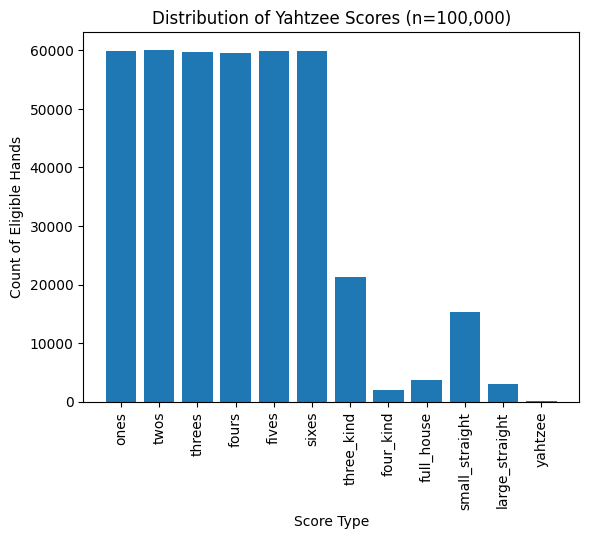

In [11]:
fig, ax = plt.subplots()

ax.bar(results.keys(), results.values())
ax.set_xticks(range(len(results)))
ax.set_xticklabels(results.keys(), rotation=90)
ax.set_xlabel('Score Type')
ax.set_ylabel('Count of Eligible Hands')
ax.set_title(f'Distribution of Yahtzee Scores (n={n_sims:,})')

plt.show()

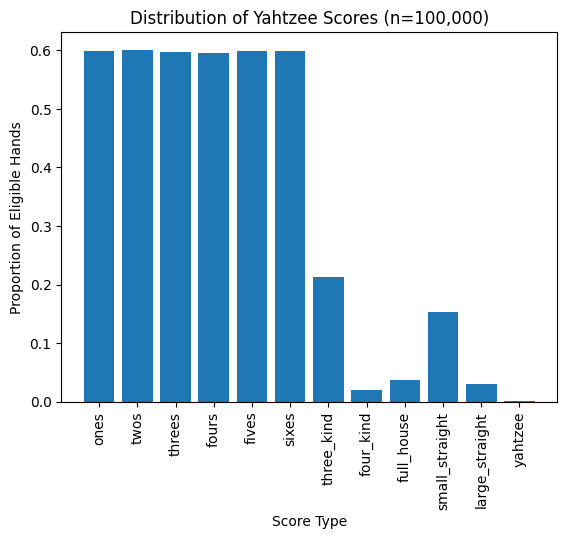

In [12]:
fig, ax = plt.subplots()

ax.bar(results.keys(), results_norm.values())
ax.set_xticks(range(len(results)))
ax.set_xticklabels(results.keys(), rotation=90)
ax.set_xlabel('Score Type')
ax.set_ylabel('Proportion of Eligible Hands')
ax.set_title(f'Distribution of Yahtzee Scores (n={n_sims:,})')

plt.show()